<a href="https://colab.research.google.com/github/Urooj-naveed/Neural-Networt/blob/main/data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

# New section

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


            x1        y1 class
0    -1.388869 -0.663469     0
2    -0.161891  1.341828     0
11   -0.832405  1.274462     0
14   -0.523260 -1.525818     0
15   -1.064407 -0.971987     0
...        ...       ...   ...
3958  0.056476 -1.442882     0
3963  0.010349 -1.007522     0
3967  0.010503 -0.873192     0
3986  0.071205 -1.535182     0
3992  0.446744 -1.047083     0

[619 rows x 3 columns]
            x1        y1 class
1     1.124912  0.376767     1
2     0.379210 -2.217188     1
11    1.329637 -2.306533     1
13    0.085128 -2.748811     1
15    1.263179 -0.722431     1
...        ...       ...   ...
3993 -0.037169  0.140793     1
3994 -0.021687 -0.175088     1
3996 -0.032985 -0.134860     1
3997 -0.044103  0.001908     1
3999 -0.136294  0.000132     1

[1292 rows x 3 columns]
Epoch 1/100
176/176 [==============================] - 3s 5ms/step - loss: 0.6223 - accuracy: 0.6467 - val_loss: 0.6479 - val_accuracy: 0.6147
Epoch 2/100
176/176 [==============================] - 1s 4ms/st

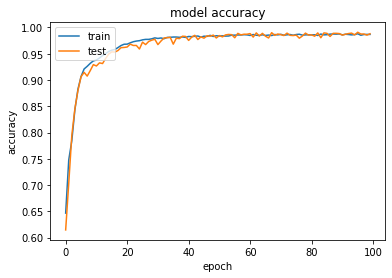

60/60 [==============================] - 0s 2ms/step
predictions shape: (1911, 1)


In [41]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

n_data_points = 2000

def regionC1(rad, thk, b, a):
  c1 = np.array([(rad+thk)/2, 0])

  # We use random radius in the interval [rad, rad+thk]
  # and random angles from 0 to pi radians.
  r1 = np.random.rand(n_data_points)*thk+rad
  a1 = np.random.rand(n_data_points)*np.pi+np.pi/2
  #conversion to cartesian:
  p1 = np.array((r1*np.cos(a1)+a, r1*np.sin(a1)))
  x1, y1 = (p1[0] - c1[0], p1[1] - c1[1])
  
  #plt.scatter(x1, y1, marker='.', linewidths=0.1)

  #creating DataFrames
  return x1, y1
  
def regionC2(rad, thk, b, a):
  c2 =  np.array([-(rad+thk)/2, 0])
  r2 = np.random.rand(n_data_points)*thk+rad
  a2 = np.random.rand(n_data_points)*np.pi-np.pi/2
  p2 = np.array((r2*np.cos(a2)+b, r2*np.sin(a2)-1))
  x2, y2 = (p2[0] - c2[0], p2[1] - c2[1])
  
  #plt.scatter(x2, y2, marker='.', linewidths=0.1)
  return x2, y2

if __name__ == '__main__':

 C1 = regionC1(1, 1, -1,1)
 C2 = regionC2(1, 1, -1,1)
 Cg = regionC2(0, 1, -0.5, 0.5)
 Cr = regionC1(0, 1, -0.5, 0.5)
 ConC1 = np.concatenate((C1, Cg), axis=1)
 ConC2 = np.concatenate((C2, Cr), axis=1)
 
 #print (ConC1, ConC2)
 #creating DataFrames
 data_C1 = pd.DataFrame(ConC1).T
 data_C1.columns = ['x1', 'y1']
 data_C1['class'] = '0'
 #print (data_C1)
 
 data_C2 = pd.DataFrame(ConC2).T
 data_C2.columns = ['x1', 'y1']
 data_C2['class'] = '1'
 
 #print (data_C2)

 msk1 = np.random.rand(len(data_C1)) < 0.8
 trainC1 = data_C1[msk1]
 testC1 = data_C1[~msk1]
 msk3 = np.random.rand(len(testC1)) < 0.2
 predictC1 = testC1[~msk3]
 print(predictC1)

 msk2 = np.random.rand(len(data_C2)) < 0.6
 trainC2 = data_C2[msk2]
 testC2 = data_C2[~msk2]
 msk4 = np.random.rand(len(testC2)) < 0.2
 predictC2 = testC2[~msk4]
 print(predictC2)
 
 #filtering data
 train_dataC1 = trainC1[['x1','y1','class']]
 test_dataC1 = testC1[['x1','y1','class']]
 pred_dataC1 = predictC1[['x1','y1','class']]
 train_dataC2 = trainC2[['x1','y1','class']]
 test_dataC2 = testC2[['x1','y1','class']]
 pred_dataC2 = predictC2[['x1','y1','class']]
    
 train_data = pd.concat([train_dataC1, train_dataC2])
 test_data = pd.concat([test_dataC1, test_dataC2])
 pred_data = pd.concat([pred_dataC1, pred_dataC2])

 #data splitting
 lb = preprocessing.LabelEncoder()
 trainX= train_data[['x1','y1']].values
 trainY= train_data[['class']].values
 train_Y= lb.fit_transform(trainY)
 #print(trainX)
 #print(train_dataC1.dtypes)
 testX= test_data[['x1','y1']].values
 testY= test_data[['class']].values
 test_Y= lb.fit_transform(testY)
 predX= pred_data[['x1','y1']].values
 predY= pred_data[['class']].values
 pred_Y= lb.fit_transform(predY)

 model = keras.Sequential()
 model.add(layers.Dense(10, activation="relu", name="layer1"))
 model.add(layers.Dense(5, activation="relu", name="layer2"))
 model.add(layers.Dense(1, activation="sigmoid", name="layer3"))
 
 optimizer = keras.optimizers.Adam(lr=0.1)
 model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
 history = model.fit(trainX, train_Y, epochs=100, batch_size=32, validation_data=(testX,test_Y))
 print("Evaluate model on test data")
 results = model.evaluate(testX, test_Y, batch_size=128)
 print("test loss, test acc:", results)

# summarize history for accuracy
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.title('model accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()

 # make class predictions with the model
 predictions = model.predict(predX)
 print("predictions shape:", predictions.shape)